## Working with Multiclass Classification Problem:
 * when you have more than two classes as option, its know as **multiclass classification**

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# lets get the data ready
from tensorflow.keras.datasets import fashion_mnist

# the data is already being divided into training and test data set
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# explore the features and labels
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
# shape 
X_train[0].shape, y_train[0].shape

((28, 28), ())

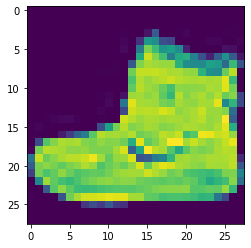

In [ ]:
# plot the image
plt.imshow(X_train[0])

In [ ]:
# check out sampels label
y_train[0]

9

In [ ]:
label = ["T-shirt/Top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Text(0.5, 1.0, 'Coat')

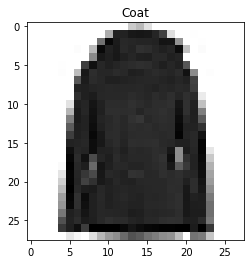

In [ ]:
index_of_choice = 2000
plt.imshow(X_train[index_of_choice], cmap = plt.cm.binary)
plt.title(label[y_train[index_of_choice]])


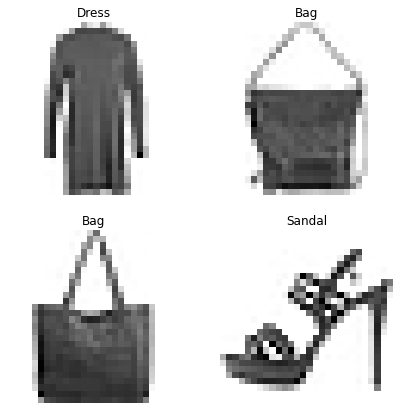

In [ ]:
# plot multiple images with there labels
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap = plt.cm.binary)
  plt.title(label[y_train[rand_index]])
  plt.axis(False)

## Building a model for multiclass classification
* Input shape = 28 x 28
* Output shape = 10 (one per class)

* when ever we are encountering the shape error and we have not flaten the tensor we have to introduce a new layer that falttens the tensor to a single vector with shape(None, Multile of all index)
* another thing to remeber is that we have to use SparseCategorical entropy to finfthe loss in case of output dat ato bein numerical formate the categoricalcross entropy expects the output data to be one got encoded

In [ ]:
#  set random seed
tf.random.set_seed(42)

# model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation ="softmax") # 10 (one per each class) and activation is changed according to the type of classification problem
])

# compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# fit the model

non_norm_history = model.fit(X_train,
                             y_train,
                             epochs = 10,
                             validation_data=(X_test, y_test)) #the test data remains still unseen but it validates it creating it as a validation

Epoch 1/10


ValueError: ignored

In [ ]:
#  set random seed
tf.random.set_seed(42)

# model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape =(28,28)), # Making the data in 1 vectoer(shape error)
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation ="softmax") # 10 (one per each class) and activation is changed according to the type of classification problem
])

# compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# fit the model

non_norm_history = model.fit(X_train,
                             y_train,
                             epochs = 10,
                             validation_data=(X_test, y_test)) #the test data remains still unseen but it validates it creating it as a validation

Epoch 1/10


ValueError: ignored

In [ ]:
#  set random seed
tf.random.set_seed(42)

# model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation =tf.keras.activations.softmax) # 10 (one per each class) and activation is changed according to the type of classification problem
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# fit the model

non_norm_history = model.fit(X_train,
                             y_train,
                             epochs = 10,
                             validation_data=(X_test, y_test)) #the test data remains still unseen but it validates it creating it as a validation

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# use categorical cross entropy when u using the one hot encoded labels

#  set random seed
tf.random.set_seed(42)

# model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation =tf.keras.activations.softmax) # 10 (one per each class) and activation is changed according to the type of classification problem
])

# compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# fit the model

non_norm_history = model.fit(X_train,
                             tf.one_hot(y_train,depth = 10),
                             epochs = 10,
                             validation_data=(X_test, tf.one_hot(y_test, depth = 10))) #the test data remains still unseen but it validates it creating it as a validation

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Scalling the data (Normalization of the data)
* we can normalize the data by dividing the data by the max value(make numbers between 0 and 1)

In [ ]:
X_train.max()

255

In [ ]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation ="relu"),
  tf.keras.layers.Dense(4, activation ="relu"),
  tf.keras.layers.Dense(10, activation ="softmax")
])

model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

norm_history = model_2.fit(X_train_norm,
            y_train,
            epochs = 10,
            validation_data = (X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

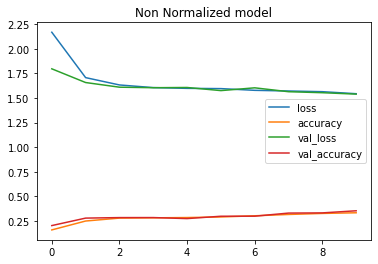

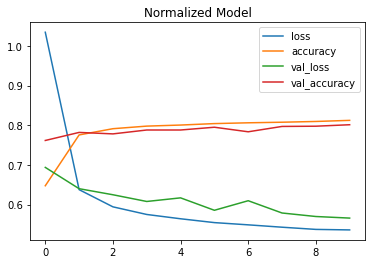

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title = "Non Normalized model")
pd.DataFrame(norm_history.history).plot(title = "Normalized Model")

## Finding the ideal learning rate

In [ ]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax")
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])


# create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 *10**(epochs/20))
# it tells that every epochs increase the lr by that amount
find_lr_history = model_3.fit(X_train_norm,
                              y_train,
                              epochs = 40,
                              validation_data = (X_test_norm, y_test),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7023 - accuracy: 0.7552 - val_loss: 0.6633 - val_accuracy: 0.7650 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6127 - accuracy: 0.7889 - val_loss: 0.6119 - val_accuracy: 0.7871 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5765 - accuracy: 0.7993 - val_loss: 0.5886 - val_accuracy: 0.7972 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5570 - accuracy: 0.8056 - val_loss: 0.5806 - val_accuracy: 0.7916 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5400 - accuracy: 0.8106 - val_loss: 0.5792 - val_accuracy: 0.7973 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [ ]:
pd.DataFrame(find_lr_history.history)


,loss,accuracy,val_loss,val_accuracy,lr
0,1.096649,0.627500,0.795858,0.7328,0.001000
1,0.702340,0.755233,0.663315,0.7650,0.001122
2,0.612695,0.788933,0.611864,0.7871,0.001259
3,0.576488,0.799317,0.588615,0.7972,0.001413
4,0.556982,0.805567,0.580565,0.7916,0.001585
5,0.539970,0.810583,0.579171,0.7973,0.001778
6,0.530365,0.812950,0.544267,0.8059,0.001995
7,0.520906,0.815967,0.550422,0.8045,0.002239
8,0.515737,0.817150,0.551226,0.8080,0.002512
9,0.511362,0.820067,0.610425,0.7896,0.002818


Text(0, 0.5, 'Loss')

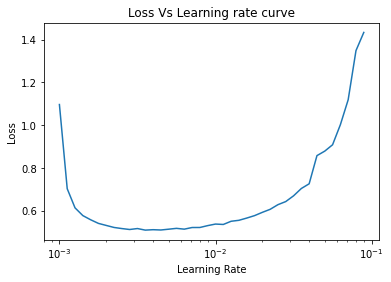

In [ ]:
# plot the lr curve
plt.semilogx(find_lr_history.history["lr"], find_lr_history.history["loss"])
plt.title("Loss Vs Learning rate curve")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

## it is observed that the default parameters are sufficient to do the most efficient to find ideal model
we can take lr as **0.001** for checking

In [ ]:
# Lets recreate the model with lr = 0.078
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax")
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

model_4.fit(X_train_norm,
            y_train,
            epochs = 40,
            validation_data = (X_test_norm, y_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our Multiclass Classification model
* Evaluate with other classification metrics
* Visualize some of the outputs
* Improve the model by Changing the architecture or by training for longer time
* Save and Export the model for use in the application

In [ ]:
# Create our confusion metrics
# make the function so that we can plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matirx(y_test, y_pred, classes = None, figsize=(10,10), text_size = 15):
  # Make the confusion the matrix 
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis] # Normalize the confusion matrix
  n_classes = cm.shape[0]

  # Lets plot
  fig, ax = plt.subplots(figsize=figsize)
  # create a mtrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # label the axis
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set xaxis labels at bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(20)
  # set threshold
  threshold = (cm.max() +cm.min())/2.
  # plot the test each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] >threshold else "black",
            size = text_size)

In [ ]:
# make some predction
y_prob = model_4.predict(X_test_norm) # prediction probabilities

In [ ]:
y_prob

array([[1.78801834e-10, 8.59335103e-11, 1.46917664e-05, ...,
        4.38645892e-02, 4.03015967e-03, 6.55011594e-01],
       [1.65367328e-05, 3.77228664e-16, 9.07316446e-01, ...,
        0.00000000e+00, 4.42385790e-04, 1.77472556e-15],
       [4.33511450e-05, 9.98505235e-01, 1.06210706e-07, ...,
        1.22946607e-16, 5.29575495e-08, 6.05440481e-12],
       ...,
       [1.69975817e-01, 1.17580357e-05, 7.96689466e-02, ...,
        2.98912904e-29, 5.22433259e-02, 4.48134427e-15],
       [1.14954219e-05, 9.97435153e-01, 1.55415307e-07, ...,
        1.05385510e-15, 2.33017374e-07, 1.71179432e-10],
       [8.86718752e-08, 1.23651303e-08, 5.53219761e-05, ...,
        5.15673030e-03, 3.81294492e-04, 4.57163202e-03]], dtype=float32)

In [ ]:
y_prob[0], tf.argmax(y_prob[0]), label[tf.argmax(y_prob[0])]

(array([1.7880183e-10, 8.5933510e-11, 1.4691766e-05, 5.1316181e-07,
        1.8115234e-05, 2.9706034e-01, 4.2002629e-08, 4.3864589e-02,
        4.0301597e-03, 6.5501159e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all the prob to intergers
y_pred = y_prob.argmax(axis = 1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

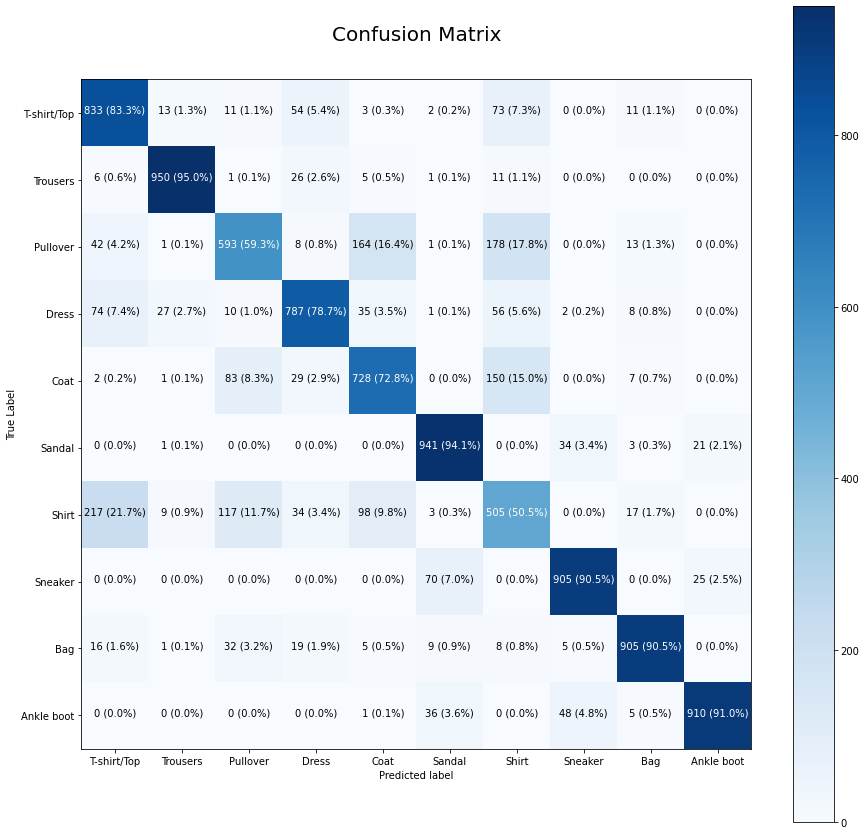

In [ ]:
plot_confusion_matirx(y_test, y_pred,
                      classes = label,
                      figsize = (15,15),
                      text_size =10)

## How about we create a function to:
* Plot a random images
* Make the prediction 
* Label the plot with the true and predicted label

In [ ]:
# plot image and its predicted and true label
import random
def plot_random_img(model, images, true_label, classes= label):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1, 28, 28))
  pred_label = label[pred_prob.argmax()]
  true_label = label[true_label[i]]
  
  # plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_prob),
                                                    true_label),
             color = color)
  

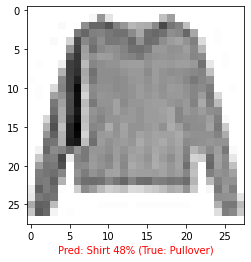

In [ ]:
plot_random_img(model_4,
                images = X_test_norm,
                true_label = y_test, 
                classes = label)